Accuracy: 73.24%


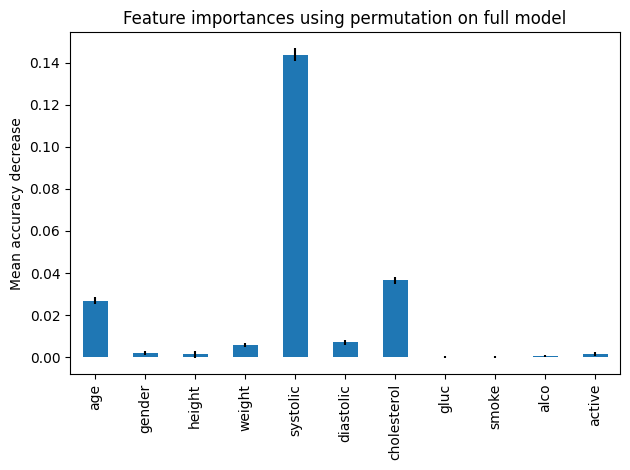

In [4]:
# XGBoost
# Alberto Villegas

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import seaborn as sns
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, average_precision_score
import xgboost as xgb
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('cardio_train.csv', sep=';')
df = df. rename(columns={df. columns[12]: 'disease'})
df = df. rename(columns={df. columns[5]: 'systolic'})
df = df. rename(columns={df. columns[6]: 'diastolic'})
target_col = 'disease'
X = df.drop(target_col, axis=1)
y = df[target_col]

X = X.drop(['id'], axis=1)
feature_names = [f"{X.columns[i]}" for i in range(X.shape[1])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1337)

weights = (y == 0).sum() / (1.0 * (y == 1).sum())

model = xgb.XGBClassifier(
                          scale_pos_weight = weights,
                          n_jobs = 4,
                          objective='binary:logistic',
                          use_label_encoder = False
                        )

modelfit = model.fit(X_train, y_train)

prediction = modelfit.predict(X_test)

acc = accuracy_score(y_test, model.predict(X_test))

print("Accuracy: %.2f%%" % (acc * 100.0))

result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
model_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
model_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()